# How captive lynxes react to new features adding in their environment

<p><img style="float: left; margin:5px 20px 5px 1px; width:30%" src="https://france3-regions.francetvinfo.fr/bourgogne-franche-comte/sites/regions_france3/files/styles/top_big/public/assets/images/2020/01/23/maxnewsfrfour314281-4615703.jpg?itok=Jn2T3ivC"></p>
<p>Captive environment can offer limited space lacking a lot of the environmental stimuli that can be found in the wild. To stimulate and improve lynx specific behaviour environmental enrichment is used. It can be defined as changes in an animal’s captive environment by providing environmental features.<p>
In this case, olfactory enrichment which involves the introduction of scent was used.

In this notebook, we are going to analyse the possible effect of olfactory enrichment on three adult lynxes.
    
*Picture taken by © Philippe Clément*

## 1. Behavioural observation

The data were collected during 36 days with each scent presented 9 times. One scent was applied every morning, and it was replaced with another scent or control after 24 hours. Behavioural observation were made 4 hours per day (including morning and afternoon).

In [8]:
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyverse)

## 2. "The scent station"

The lynxes were exposed to 4 odours treatments applied on a branch attached to a tree at a place called the "scent station" inside the enclosure :
- Valerian
- Catnip 
- Cinnamon 
- Control (water)

Let's start by looking at the data.

In [26]:
enrichment <- read_csv("enrichment.csv")

enrichment%>%
arrange(desc(Occurence))%>%
top_n(15)

Parsed with column specification:
cols(
  Lynx = col_character(),
  Scent = col_character(),
  Behavior = col_character(),
  Day = col_double(),
  Occurence = col_double()
)
Selecting by Occurence


Lynx,Scent,Behavior,Day,Occurence
Loger,Catnip,Rubbing,8,48
Loger,Catnip,Rubbing,7,25
Loger,Catnip,Rubbing,6,18
Loger,Catnip,Sniffing,7,17
Loger,Catnip,Biting,6,11
Loger,Catnip,Sniffing,6,8
Lovika,Cinamon,Scent marking,8,8
Loger,Catnip,Licking,6,6
Loger,Catnip,Sniffing,7,6
Loger,Catnip,Licking,7,6


## 3. The surprising number of behavior occured with the catnip

The table above shows the number of behavior directed toward the enrichment for each scent for each lynx for each day.
You will notice that the lynxes showed more behavior with the catnip treatment.

We can see more clearly if we look at the total number of each behavior for each scent of all individuals combined.

In [27]:
scent_lynx <- enrichment%>%
mutate(Scent = str_replace(Scent, "Cinamon", "Cinnamon"))%>%
group_by(Behavior, Scent)%>%
summarize(Nb_occur = sum(Occurence))%>%
arrange(Scent, desc(Nb_occur))

scent_lynx

Behavior,Scent,Nb_occur
Rubbing,Catnip,107
Sniffing,Catnip,71
Biting,Catnip,24
Approach,Catnip,18
Scent marking,Catnip,16
Licking,Catnip,15
Scratching,Catnip,4
Sniffing,Cinnamon,26
Scent marking,Cinnamon,23
Approach,Cinnamon,11


## 4. The effect of catnip

Let's plot to see the effect of catnip.

The catnip treatment induce a higher number of biting, licking, rubbing, and sniffing than the control, cinnamon and valerian treatments.
The lynxes interacted more with the catnip treatment compared to the other two treatments and control.

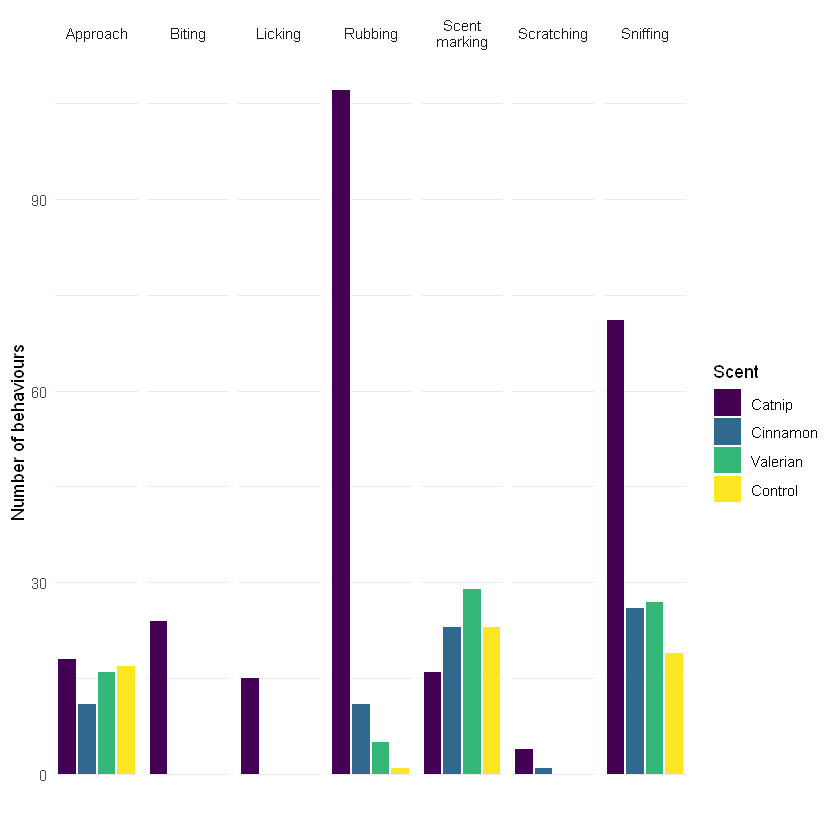

In [33]:
library(viridis)

labels <- c("Approach" = "Approach",
            "Biting" = "Biting",
            "Licking" = "Licking",
            "Rubbing" = "Rubbing",
            "Scent marking" = "Scent\nmarking",
            "Scratching" = "Scratching",
            "Sniffing" = "Sniffing")


scent_lynx%>%
  mutate(Scent = factor(Scent, levels = c("Catnip", "Cinnamon", "Valerian", "Control")))%>%
  ggplot(aes(x= factor(Scent), y=Nb_occur, fill=Scent))+
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_blank()) +
  xlab("")+
  ylab("Number of behaviours")+
  scale_x_discrete(breaks=NULL)+
  scale_fill_viridis(discrete = TRUE)+
  facet_grid(~Behavior, labeller=labeller(Behavior = labels))+
  theme_minimal()

## 5. Eagle eye

Lynxes are nocturnals animals. So, around what time they were interacted the most with the enrichment ?

The scents were placed every morning at 8.30. Visual observation between 9-11AM and 8-10PM.
The human eye was not enough to observe under 24 hours. That's why monitoring technologies were used to help.

- **HDX pit tag**

Part of the scent station and a rectangular antenna fixed to a fur tree. It was designed to detect  23mm long pit tags injected subcutaneously between the lynx should blades. This antenna was used to monitor the visits at the scent station.


- **Bluetooth Low Energy (BLE)**

Transmitters attached to a collar; the BLE signal was detected by smartphones placed on a box attached to the same tree as the HDX pit antenna. The signal strength can be used as a proxy for distance it is possible to gauge the distance between the animal and the smartphone. Similarly, it was used monitor the visits at the scent station.

Let's take a look at the data.

In [23]:
ggtech <- read_excel("ggtech.xlsx", col_types = c("date", 
    "numeric", "text", "numeric"))%>%
rename("Nb_visit" = "Count")

ggtech%>%
arrange(desc(Nb_visit))%>%
top_n(20)



Selecting by Nb_visit


Date,Hour,Tech,Nb_visit
2018-07-24,2,HDX PIT tag,6
2018-07-24,2,BLE tag,4
2018-07-10,9,Visual Observation,3
2018-07-17,22,Visual Observation,3
2018-07-24,8,HDX PIT tag,3
2018-07-28,23,HDX PIT tag,3
2018-07-06,9,HDX PIT tag,2
2018-07-06,9,Visual Observation,2
2018-07-08,8,Visual Observation,2
2018-07-11,22,Visual Observation,2


## 6. Temporality

The lynxes tend to visit the scent station in the morning around 8-9 AM and during the night 10.00 PM which corresponds of the time observed during visual observation... 

Let's visualize the data on a clock to have a clearer view !

Warning message:
"Removed 2 rows containing missing values (geom_col)."

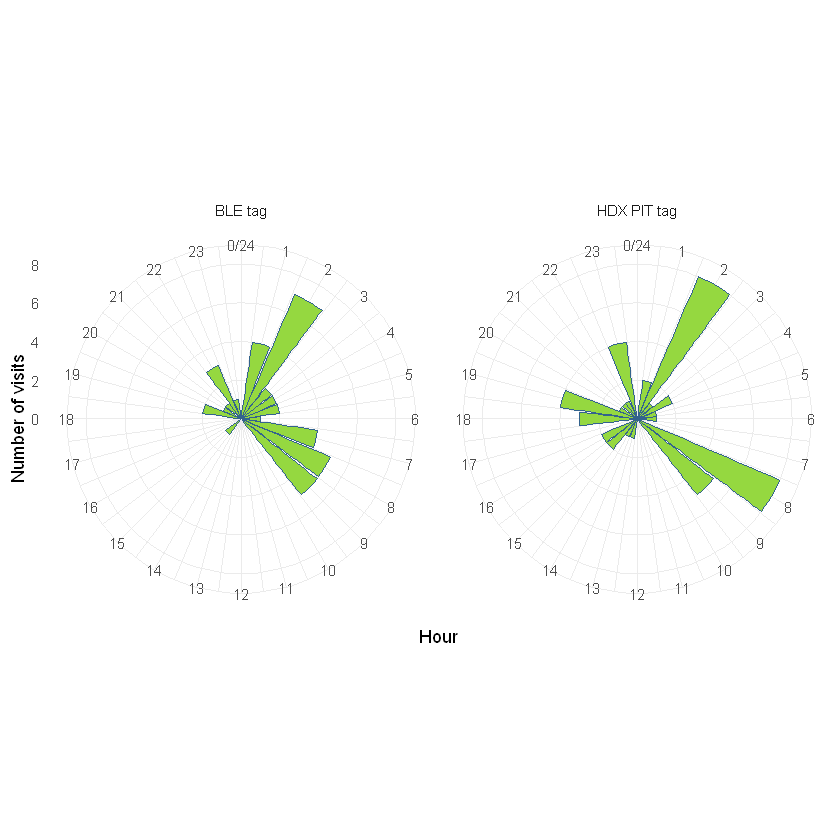

In [36]:
ggtech_hour <- ggtech%>%
  group_by(Hour, Tech)%>%
  filter(!Tech == "Visual Observation")%>%
  summarize(Nb_visit = sum(Nb_visit))

ggplot(ggtech_hour, aes(x= Hour, y = Nb_visit))+
  geom_col (color = "#33638DFF", fill = "#95D840FF")+
  coord_polar(start = 0) + 
  ylab("Number of visits")+
  #scale_y_continuous(breaks = NULL)+
  theme_minimal() + 
  theme(legend.position="none")+
  scale_x_continuous("Hour", limits = c(0, 24), 
                     breaks = seq(0, 24), 
                     labels = seq(0, 24))+
facet_grid(~ Tech)

## 7. Technology vs Human

With the tech the lynxes visited the enrichment around the clock but with a peak at 8-9AM and another peak at 2 AM which was not possible to see with the visual observation.


**How about comparing the technologies and visual observation on the timing of visit ?**


The graph below shows that the HDX PIT tag and BLE tag systems overlapped only three days of matching data where 6 occasions were logged by both systems (July 23-24). The BLE tags were logged alone 29 times in another 15 days, and the HDX PIT tags were logged alone on 27 times in 12 days.

**41 visits logged by visual observations failed to be logged by any of the automated systems**  

*Unfortunately, due to a technical malfunction, the HDX PIT tag data was collected during only between July 5 and 28 and the BLE tag only between July 25 to August 4. That could explain why they failed to log some visits.*

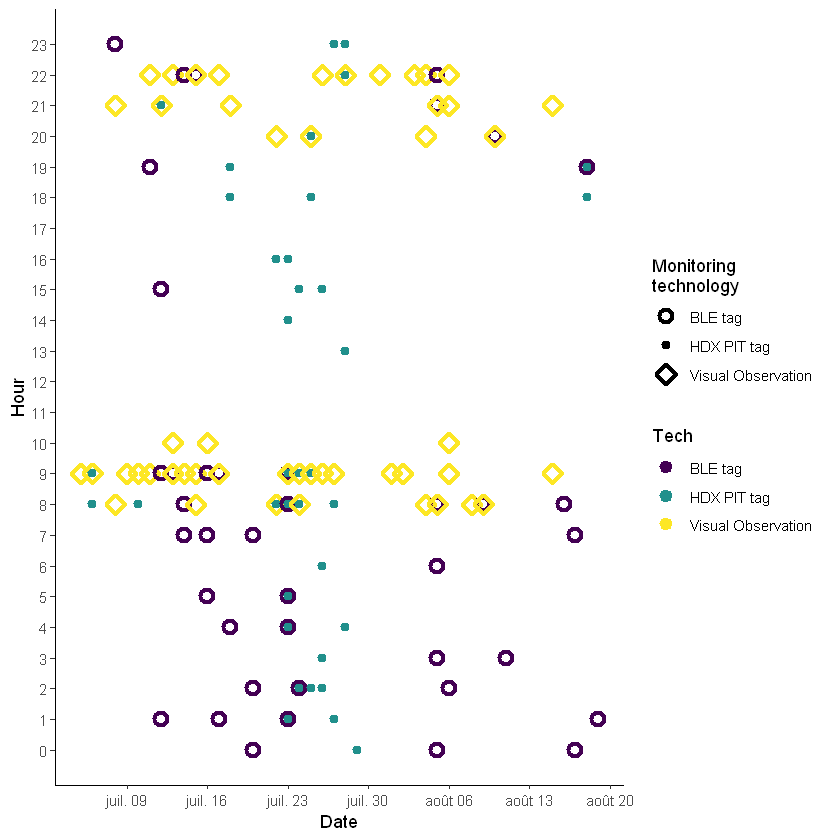

In [40]:
ggplot(ggtech, aes(x = Date, y = Hour, colour = Tech, shape = Tech,
                    size = Tech))+
  geom_point(stroke = 2)+
  scale_x_datetime(date_breaks = "1 week", date_labels = "%b %d")+
  scale_y_continuous(breaks = seq(0, 23, 1),
                     limits = c(0, 23))+
  scale_color_viridis(discrete = TRUE)+
  scale_shape_manual(values=c(1,20, 5),
                     name = "Monitoring\ntechnology")+
  scale_size_manual(values=c(2.5,1, 2.5),
                    name = "Monitoring\ntechnology")+
  ylab("Hour")+
  theme_classic()

## 8.  Conclusion

These technologies covered the whole 24 hours per day but they only logged limited aspects of the lynxes’ behaviour. The visual observations, on the other hand, produced detailed data on behaviour, but was much more limited in time. Hence a combination of these techniques is a powerful tool to see the activity pattern of the lynxes.


*Please note that this notebook was made from my Master's thesis project at Linkoping University in partnership with Kolmarden Wildlife Park. This notebook is based on data manipulation and data visualization. To read the full thesis simply google : "Effect of sensory enrichments on the behaviour of captive Northern lynx (Lynx lynx lynx) and assessment of automated behaviour monitoring technologies".*